In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#===============================================
# Small helper to keep formatting consistent.
#===============================================
hw = {
    "figsize": (9 , 4) ,
    "grid": True ,
    "legend": True ,
}

def finish(ax , title , xlabel = None , ylabel = None):
    ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    plt.tight_layout()
    return ax

In [24]:
#=========
# Setup
#=========
np.random.seed(928)

df_box = pd.DataFrame({
    "region": (["East"] * 20) + (["West"] * 20) + (["Central"] * 20) ,
    "order_value": np.r_[
        np.random.normal(180 , 35 , 20) ,
        np.random.normal(220 , 55 , 20) ,
        np.random.normal(160 , 30 , 20) ,
    ]
})
df_box["order_value"] = df_box["order_value"].clip(lower = 20).round(2)
df_box.head()

df_area = pd.DataFrame({
    "month": pd.to_datetime(["2025-09-01" , "2025-10-01" , "2025-11-01" , "2025-12-01" , "2026-01-01"]) ,
    "Cable": [80 , 95 , 100 , 120 , 110] ,
    "Wire": [60 , 70 , 90 , 85 , 105] ,
    "Switch": [30 , 40 , 35 , 45 , 50] ,
}).set_index("month")
df_area

,region,order_value
0,East,238.20
1,East,204.83
2,East,176.57
3,East,168.86
4,East,160.67


,Cable,Wire,Switch
month,,,
2025-09-01,80,60,30
2025-10-01,95,70,40
2025-11-01,100,90,35
2025-12-01,120,85,45
2026-01-01,110,105,50


<Axes: title={'center': 'Case 1: Order value distribution (box plot)'}, ylabel='Order value'>

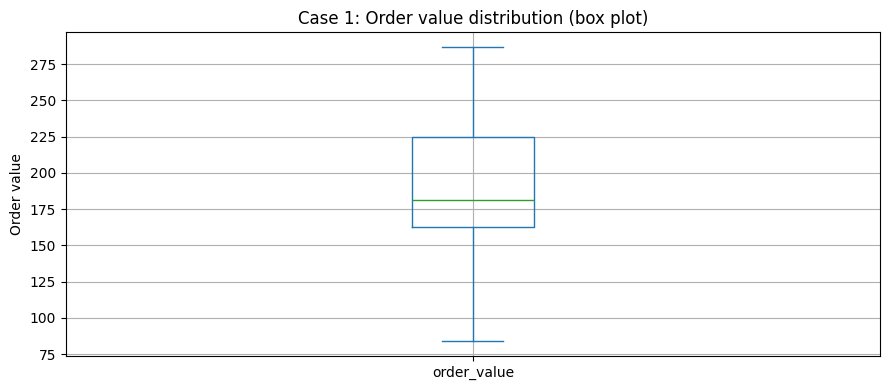

In [25]:
#===========================
# Case 1) Box plot (basic)
#===========================
ax = df_box[["order_value"]].plot(kind = "box" , **{**hw , "legend": False})
finish(ax , "Case 1: Order value distribution (box plot)" , ylabel = "Order value")
plt.show()

<Axes: title={'center': 'Case 2: Box plot by region (compare spread/outliers)'}, ylabel='Order value'>

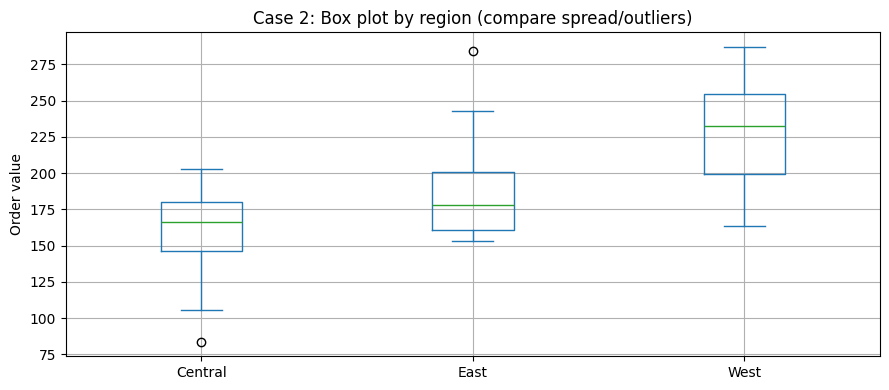

In [26]:
#===================================================
# Case 2) Box plot by category (group comparison)
#===================================================
pivot = df_box.pivot(columns = "region" , values = "order_value")
ax = pivot.plot(kind = "box" , **{**hw , "legend": False})
finish(ax , "Case 2: Box plot by region (compare spread/outliers)" , ylabel = "Order value")
plt.show()

<Axes: title={'center': 'Case 3: Density (KDE) for East'}, xlabel='Order value', ylabel='Density'>

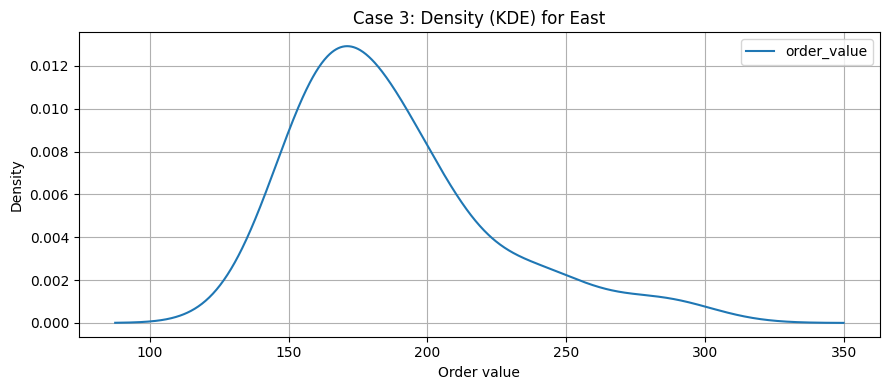

In [27]:
#=================================
# Case 3) KDE / Density (basic)
#=================================
ax = df_box.loc[df_box["region"].eq("East") , "order_value"].plot(kind = "kde" , **hw)
finish(ax , "Case 3: Density (KDE) for East" , xlabel = "Order value" , ylabel = "Density")
plt.show()

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: title={'center': 'Case 4: Density comparison across regions'}, xlabel='Order value', ylabel='Density'>

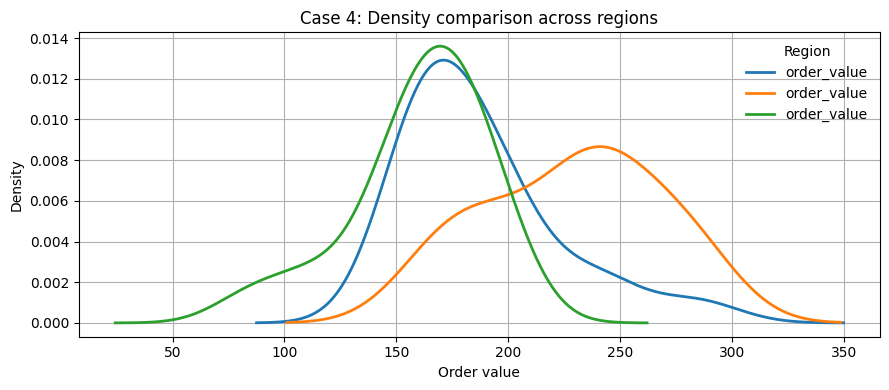

In [28]:
#=========================================================
# Case 4) Density overlays with styling (compare groups)
#=========================================================
fig , ax = plt.subplots(figsize = hw["figsize"])
for r in ["East" , "West" , "Central"]:
    df_box.loc[df_box["region"].eq(r) , "order_value"].plot(kind = "kde" , ax = ax , linewidth = 2)
ax.legend(title = "Region" , frameon = False)
ax.grid(hw["grid"])
finish(ax , "Case 4: Density comparison across regions" , xlabel = "Order value" , ylabel = "Density")
plt.show()

<Axes: title={'center': 'Case 5: Sales composition over time (stacked area)'}, xlabel='Month', ylabel='Sales'>

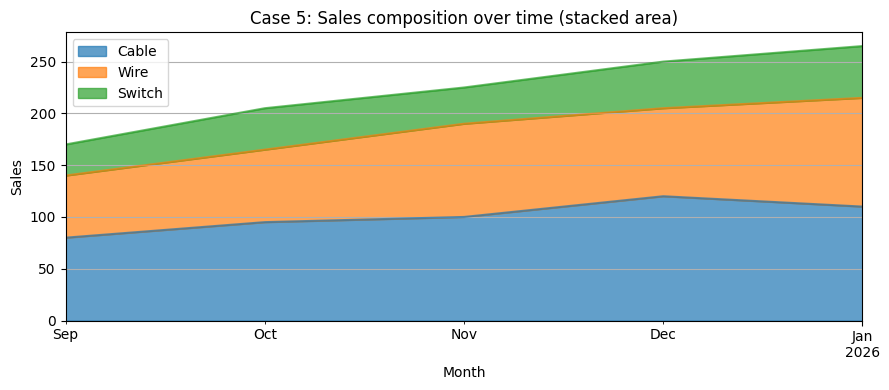

In [29]:
#======================================================
# Case 5) Area plot (stacked contribution over time)
#======================================================
ax = df_area.plot(kind = "area" , stacked = True , alpha = 0.7 , **hw)
finish(ax , "Case 5: Sales composition over time (stacked area)" , xlabel = "Month" , ylabel = "Sales")
plt.show()

<Axes: title={'center': 'Case 6: Trends per product (unstacked area)'}, xlabel='Month', ylabel='Sales'>

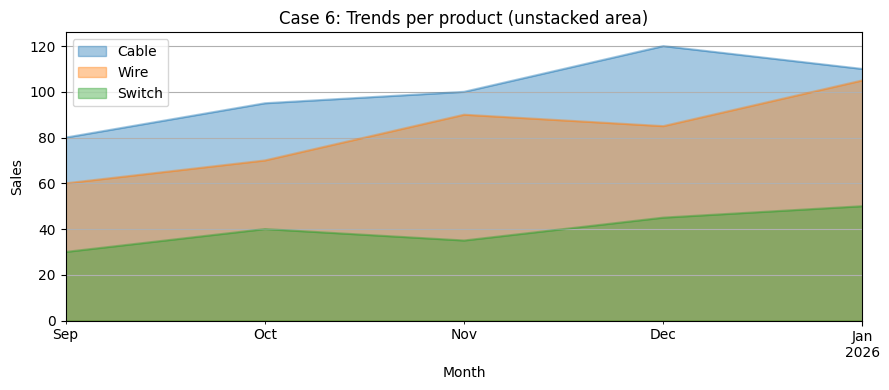

In [30]:
#=================================
# Case 6) Area plot (unstacked)
#=================================
ax = df_area.plot(kind = "area" , stacked = False , alpha = 0.4 , **hw)
finish(ax , "Case 6: Trends per product (unstacked area)" , xlabel = "Month" , ylabel = "Sales")
plt.show()